In [388]:
# import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [390]:
!pip install missingno


In [392]:
import missingno as msno
import warnings
warnings.filterwarnings('ignore')

In [393]:
#libraries for model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.preprocessing import LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [396]:
#libraries for model evalution
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import recall_score,f1_score,roc_curve, roc_auc_score,precision_score


In [412]:
#Load Dataset
airline_data = pd.read_excel('C:/Users/sravy/Downloads/Airline passenger referral/data_airline_reviews.xlsx')
airline_data.head()

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Turkish Airlines,7.0,Christopher Hackley,8th May 2019,âœ… Trip Verified | London to Izmir via Istanb...,NaN,Business,Economy Class,London to Izmir via Istanbul,2019-05-01 00:00:00,4.0,5.0,4.0,4.0,2.0,4.0,yes
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Turkish Airlines,2.0,Adriana Pisoi,7th May 2019,âœ… Trip Verified | Istanbul to Bucharest. We ...,NaN,Family Leisure,Economy Class,Istanbul to Bucharest,2019-05-01 00:00:00,4.0,1.0,1.0,1.0,1.0,1.0,no
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [414]:
#Dataset Rows and Columns Count
print(airline_data.shape)

(131895, 17)


In [416]:
airline_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131895 entries, 0 to 131894
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          65947 non-null  object 
 1   overall          64017 non-null  float64
 2   author           65947 non-null  object 
 3   review_date      65947 non-null  object 
 4   customer_review  65947 non-null  object 
 5   aircraft         19718 non-null  object 
 6   traveller_type   39755 non-null  object 
 7   cabin            63303 non-null  object 
 8   route            39726 non-null  object 
 9   date_flown       39633 non-null  object 
 10  seat_comfort     60681 non-null  float64
 11  cabin_service    60715 non-null  float64
 12  food_bev         52608 non-null  float64
 13  entertainment    44193 non-null  float64
 14  ground_service   39358 non-null  float64
 15  value_for_money  63975 non-null  float64
 16  recommended      64440 non-null  object 
dtypes: float64

In [418]:
airline_data.duplicated().value_counts()

True     70711
False    61184
Name: count, dtype: int64

In [422]:
#getting duplicate values
print(f' Duplicate data count = {airline_data[airline_data.duplicated()].shape[0]}')
airline_data[airline_data.duplicated()]

 Duplicate data count = 70711


,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131885,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131887,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131889,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131891,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [424]:
#droping the null values
airline_data.drop_duplicates(inplace = True)

In [426]:
#count dupicate values 
airline_data.duplicated().sum()

0

In [428]:
#count missing values / null values
airline_data.isnull().sum()

airline                1
overall             1783
author                 1
review_date            1
customer_review        1
aircraft           42696
traveller_type     23644
cabin               2479
route              23671
date_flown         23750
seat_comfort        4973
cabin_service       4944
food_bev           12843
entertainment      20954
ground_service     24015
value_for_money     1857
recommended         1423
dtype: int64

<Axes: >

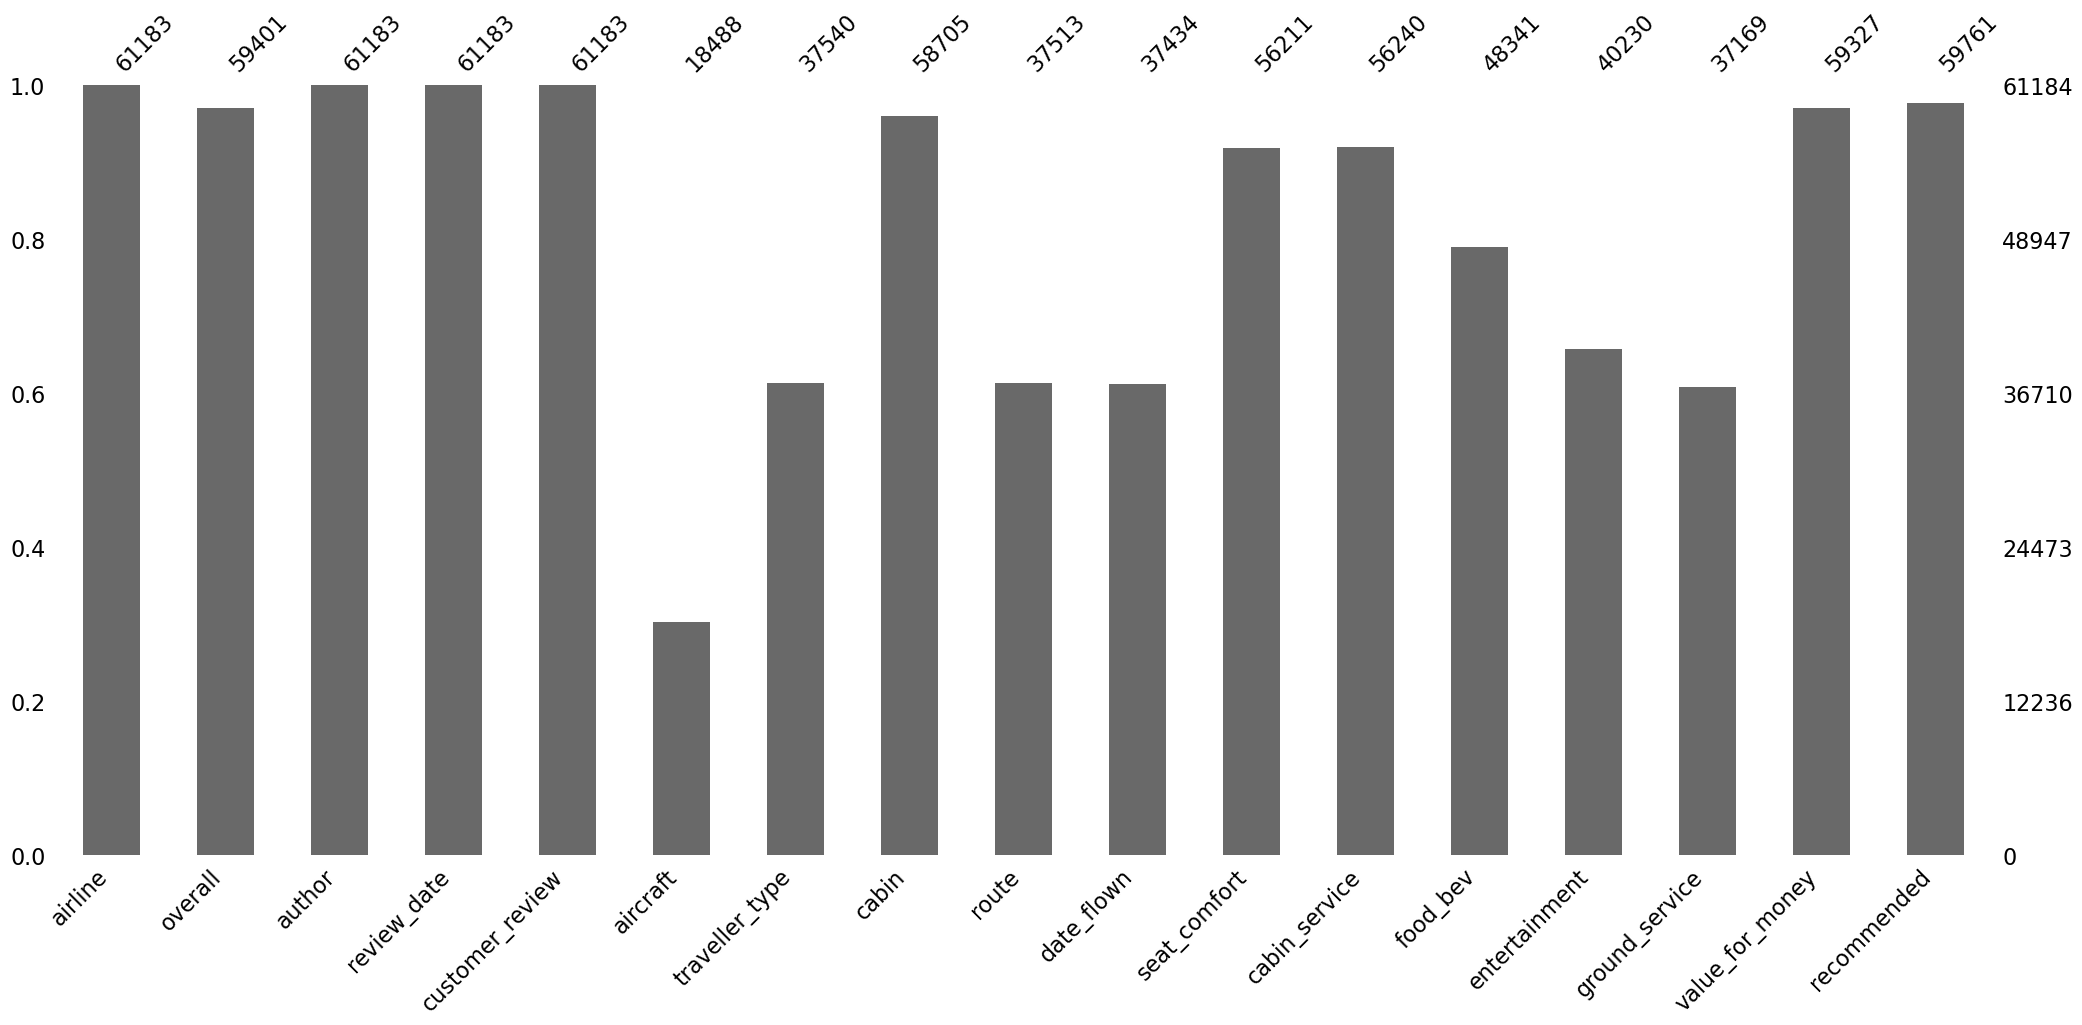

In [430]:
#visulization of missing values
msno.bar(airline_data)

## Dataset Summary:
1. Data set has toatl 131895 observations with 17 different features.
2. There are null values in all of the features
3. There are total of 70711 duplicated values.

## Understand the data

In [432]:
#Dataset columns
print(f'Features: {airline_data.columns.to_list()}')

Features: ['airline', 'overall', 'author', 'review_date', 'customer_review', 'aircraft', 'traveller_type', 'cabin', 'route', 'date_flown', 'seat_comfort', 'cabin_service', 'food_bev', 'entertainment', 'ground_service', 'value_for_money', 'recommended']


In [434]:
airline_data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
airline,61183,81,Spirit Airlines,2871,NaN,NaN,NaN,NaN,NaN,NaN,NaN
overall,59401.0,NaN,NaN,NaN,5.164863,3.483701,1.0,1.0,5.0,9.0,10.0
author,61183,44069,Anders Pedersen,93,NaN,NaN,NaN,NaN,NaN,NaN,NaN
review_date,61183,3015,19th January 2015,198,NaN,NaN,NaN,NaN,NaN,NaN,NaN
customer_review,61183,61172,I flew from Chicago O'Hare to Dublin and from ...,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
aircraft,18488,2088,A320,2130,NaN,NaN,NaN,NaN,NaN,NaN,NaN
traveller_type,37540,4,Solo Leisure,13935,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cabin,58705,4,Economy Class,45171,NaN,NaN,NaN,NaN,NaN,NaN,NaN
route,37513,24549,BKK to LHR,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date_flown,37434,63,August 2015,1127,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [436]:
#Unique values for each variable
for i in airline_data.columns.tolist():
  print(f'Number of unique value in {i} is {airline_data[i].nunique()}.')

Number of unique value in airline is 81.
Number of unique value in overall is 10.
Number of unique value in author is 44069.
Number of unique value in review_date is 3015.
Number of unique value in customer_review is 61172.
Number of unique value in aircraft is 2088.
Number of unique value in traveller_type is 4.
Number of unique value in cabin is 4.
Number of unique value in route is 24549.
Number of unique value in date_flown is 63.
Number of unique value in seat_comfort is 5.
Number of unique value in cabin_service is 5.
Number of unique value in food_bev is 5.
Number of unique value in entertainment is 5.
Number of unique value in ground_service is 5.
Number of unique value in value_for_money is 5.
Number of unique value in recommended is 2.


## Exploratory Data Analysis(EDA)

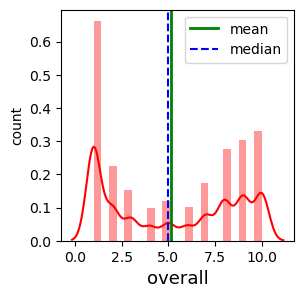

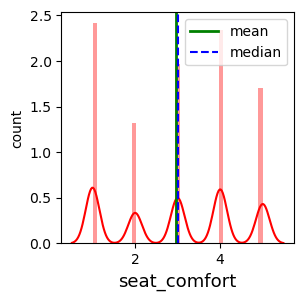

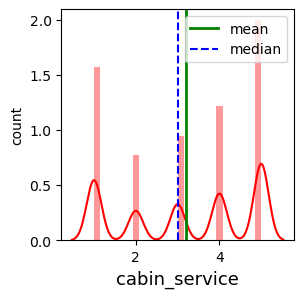

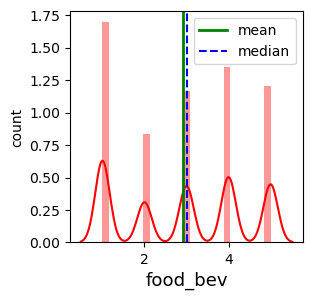

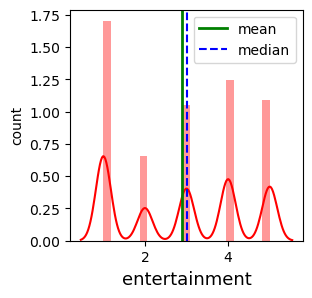

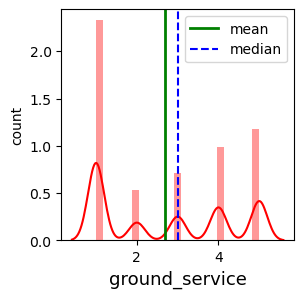

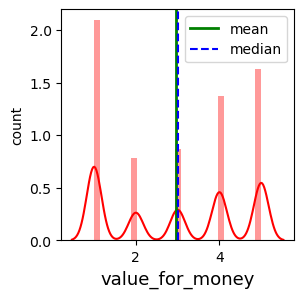

In [438]:
#visulization of distribution
for col in [ 'overall',   'seat_comfort', 'cabin_service', 'food_bev', 'entertainment', 'ground_service', 'value_for_money']:
  plt.figure(figsize=(3,3))
  sns.distplot(airline_data[col], color='r')
  plt.xlabel(col, fontsize=13)
  plt.ylabel('count')

# Plotting the mean and the median.
  plt.axvline(airline_data[col].mean(),color='green',linewidth=2,label='mean')   
  plt.axvline(airline_data[col].median(),color='blue',linestyle='dashed',linewidth=1.5,label='median')
  plt.legend(bbox_to_anchor = (1.0, 1), loc = 'upper right')
  plt.show()

## Based on the chart:
1. Most of the passenger gave overall rating around 4.5
2. Most of the passenger gave seat comfort rating 3
3. .Most of the passenger gave cabin service as 3.2
4. Most of the passenger gave food beverage service as 3
5. Most of the passenger gave entertainment service as 2.9
6. Most of the passenger gave ground service as 3
7. Most of the passenger gave value for money rating as 3

## Which traveler has more rating

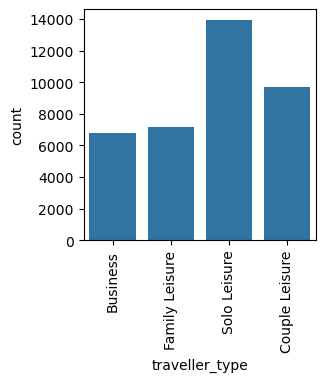

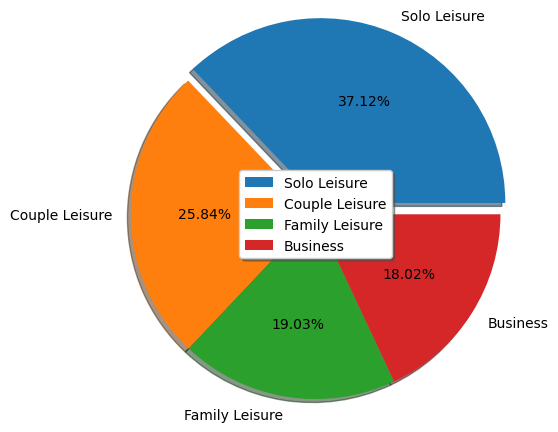

In [440]:
#set the fig size and plotting the graph
airline_data.dropna(subset=['traveller_type'],inplace=True)
plt.figure(figsize=(3,3))
sns.countplot(x=airline_data['traveller_type'],data=airline_data)
plt.xticks(rotation=90)
plt.show()

print(" ")

label_for_traveller = ['Solo Leisure','Couple Leisure','Family Leisure','Business']
data1 = airline_data['traveller_type'].value_counts().values
explode = [0.1, 0, 0, 0]
plt.figure(figsize=(4,4))
plt.axis("equal")
plt.pie(data1, labels = label_for_traveller,explode=explode,radius=1.5,autopct='%0.2f%%',shadow=True,textprops={'fontsize': 10})
plt.legend(loc='center',shadow=True,fancybox=True)
plt.show()

## We can conclude from the graph that Solo Leisure has highest value counts, therefore we can say that most of the people who travel by air is solo(37.22%)

## Which type of cabin has more recomended?

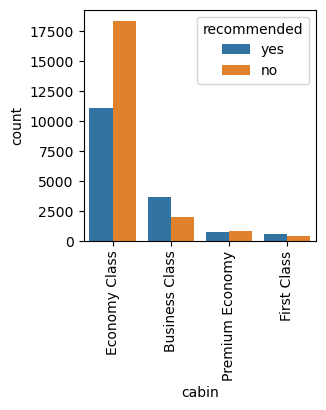

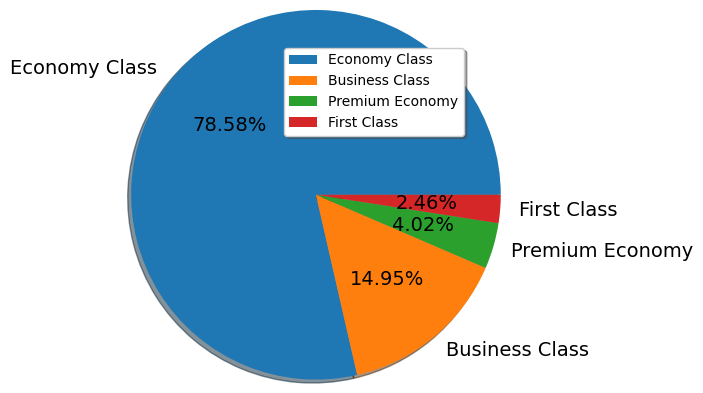

In [442]:
#setting the figure size and plotting the graph
airline_data.dropna(subset=['recommended'],inplace=True)
plt.figure(figsize=(3,3))
sns.countplot(x=airline_data['cabin'],hue=airline_data['recommended'])
plt.xticks(rotation=90)
plt.show()

print(" ")


label_for_cabin = ['Economy Class','Business Class','Premium Economy','First Class']
data2 = airline_data['cabin'].value_counts().values
plt.figure(figsize=(4,4))
plt.axis("equal")
plt.pie(data2, labels = label_for_cabin,radius=1.5,autopct='%0.2f%%',shadow=True,textprops={'fontsize': 14})
plt.legend(loc='upper right',shadow=True,fancybox=True)
plt.show()

## We can conclude from the above graph thatm people choose Economy class the most than followed by Business class and also Economy class is the one with highest counts of bad reviews.

## What is the % of Cabin service rating by Passengers

cabin_service
5.0    10715
1.0     9735
4.0     6100
3.0     5367
2.0     4568
Name: count, dtype: int64
[10715  9735  6100  5367  4568]


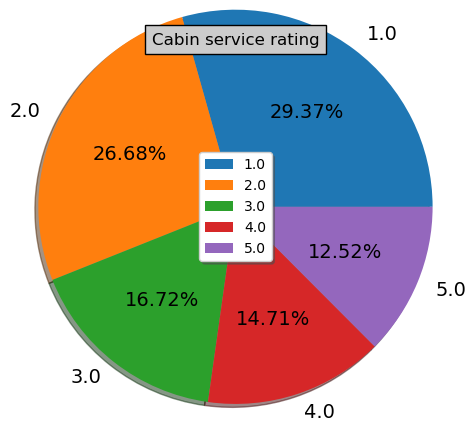

In [444]:
#setting the figure size and plotting the graph
label_for_cabin_service = ['1.0','2.0','3.0','4.0','5.0']
data3 = airline_data['cabin_service'].value_counts().values
print(airline_data['cabin_service'].value_counts())
print(data3)
plt.figure(figsize=(4,4))
plt.axis("equal")
plt.title('Cabin service rating',bbox={'facecolor':'0.8', 'pad':5})
plt.pie(data3, labels = label_for_cabin_service,radius=1.6,autopct='%0.2f%%',shadow=True,textprops={'fontsize': 14})
plt.legend(loc='center',shadow=True,fancybox=True)
plt.show()




## What is the average rating of Food beverages and Entertainment in Economy class?

<Axes: xlabel='cabin'>

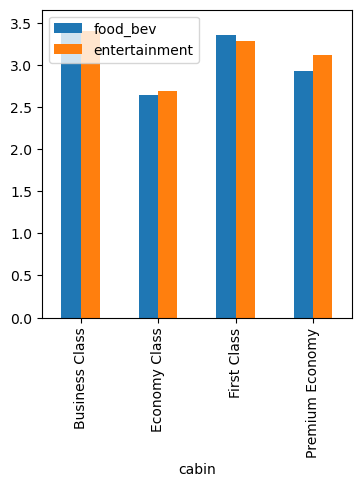

In [446]:
#setting the figure size and plotting the graph
gp_by_cabin=airline_data.groupby('cabin')[['food_bev','entertainment']].mean().reset_index()
plt.rcParams['figure.figsize']=(4,4)
gp_by_cabin.plot(x="cabin", y=["food_bev", "entertainment"], kind="bar")



## From the graph we can conclude that the food beverages and entertainment ratings are lower in Economy class compared to other classes.

## Percentage of food beverages ratings by passengers?

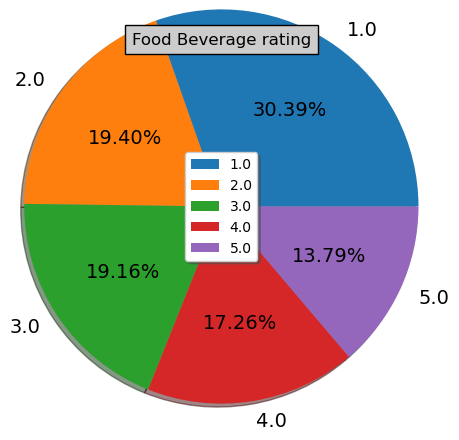

In [448]:
#setting the figure size and plotting the graph
label_for_food_service = ['1.0','4.0','5.0','3.0','2.0']
data3 = airline_data['food_bev'].value_counts().values
plt.figure(figsize=(4,4))
plt.axis("equal")
plt.title('Food Beverage rating',bbox={'facecolor':'0.8', 'pad':5})
plt.pie(data3, labels = label_for_cabin_service,radius=1.6,autopct='%0.2f%%',shadow=True,textprops={'fontsize': 14})
plt.legend(loc='center',shadow=True,fancybox=True)
plt.show()


## We can say that arounf 30% of passengers gave ratings of 4 & 5 ao we can coclude overall ratinf is good and good food beverages positively impact the airline business.

## Variation of Recommendation feature with Seat Comfort:

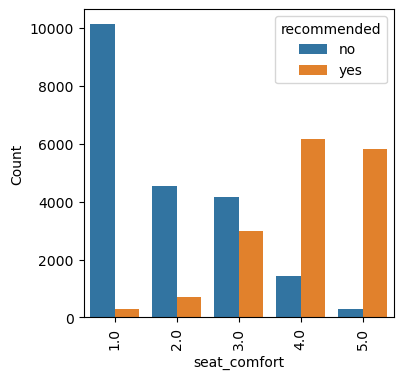

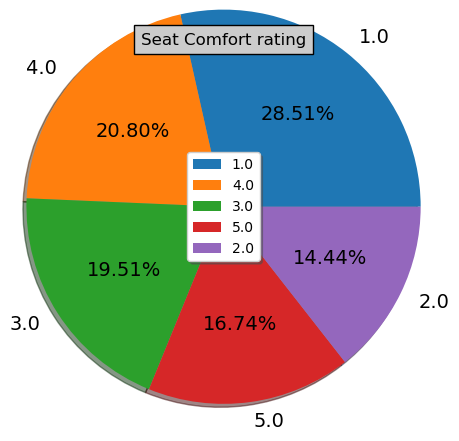

In [450]:
#setting the figure size and plotting the graph
airline_data.dropna(subset=['recommended'],inplace=True)
plt.figure(figsize=(4,4))
sns.countplot(x=airline_data['seat_comfort'],hue=airline_data['recommended'])
plt.xlabel('seat_comfort')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

print(" ")
label_for_seat_service = ['1.0','4.0','3.0','5.0','2.0']
data4 = airline_data['seat_comfort'].value_counts().values
plt.figure(figsize=(4,4))
plt.axis("equal")
plt.title('Seat Comfort rating',bbox={'facecolor':'0.8', 'pad':5})
plt.pie(data4, labels = label_for_seat_service,radius=1.6,autopct='%0.2f%%',shadow=True,textprops={'fontsize': 14})
plt.legend(loc='center',shadow=True,fancybox=True)
plt.show()


## Variation of Recommendation feature with Entertainment:

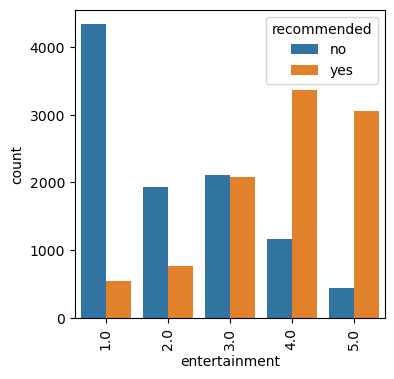

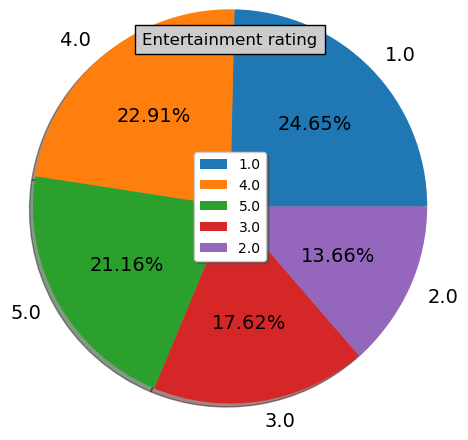

In [353]:
#setting the figure size and plotting the graph
airline_data.dropna(subset=['recommended'],inplace=True)
plt.figure(figsize=(4,4))
sns.countplot(x=airline_data['entertainment'],hue=airline_data['recommended'])
plt.xlabel('entertainment')
plt.ylabel('count')
plt.xticks(rotation=90)
plt.show()

print(" ")

label_for_ent_service = ['1.0','4.0','5.0','3.0','2.0']
data5 = airline_data['entertainment'].value_counts().values
plt.figure(figsize=(4,4))
plt.axis("equal")
plt.title('Entertainment rating',bbox={'facecolor':'0.8', 'pad':5})
plt.pie(data5, labels = label_for_ent_service,radius=1.6,autopct='%0.2f%%',shadow=True,textprops={'fontsize': 14})
plt.legend(loc='center',shadow=True,fancybox=True)
plt.show()


## Variation of Recommendation feature with Value for Money:

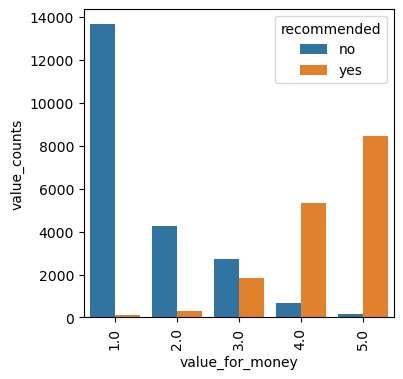

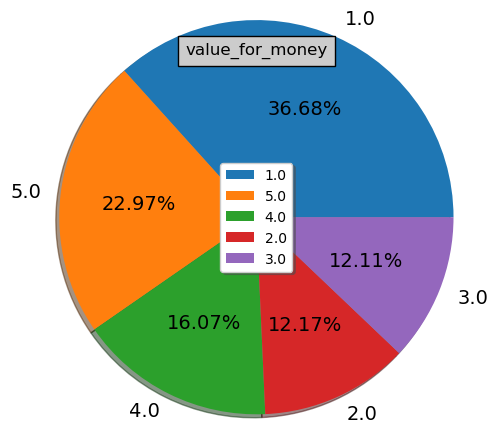

In [454]:
#setting the figure size and plotting the graph
airline_data.dropna(subset=['recommended'],inplace=True)
plt.figure(figsize=(4,4))
sns.countplot(x=airline_data['value_for_money'],hue=airline_data['recommended'])
plt.xlabel('value_for_money')
plt.ylabel('value_counts')
plt.xticks(rotation=90)
plt.show()

print(" ")

label_for_money = ['1.0','5.0','4.0','2.0','3.0']
data6 = airline_data['value_for_money'].value_counts().values
plt.figure(figsize=(4,4))
plt.axis("equal")
plt.title('value_for_money',bbox={'facecolor':'0.8', 'pad':5})
plt.pie(data6, labels = label_for_money,radius=1.6,autopct='%0.2f%%',shadow=True,textprops={'fontsize': 14})
plt.legend(loc='center',shadow=True,fancybox=True)
plt.show()


## % of Overall ratings by Passengers?

overall
1.0     12621
10.0     4361
9.0      4083
2.0      3801
8.0      3655
3.0      2421
7.0      2315
5.0      1481
4.0      1439
6.0      1361
Name: count, dtype: int64


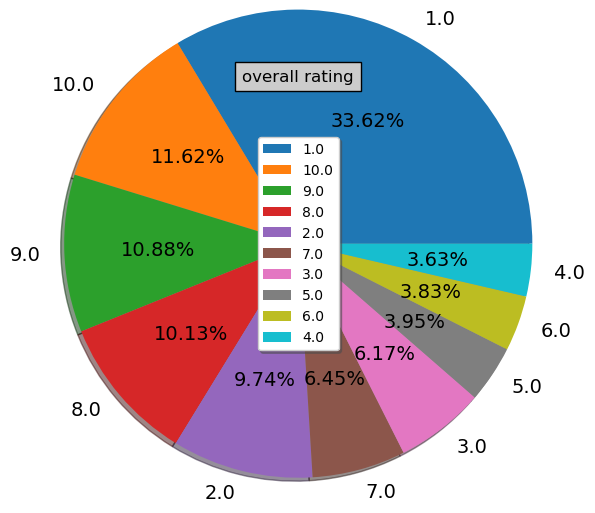

In [456]:
#setting the fig size and plotting the graph
label_for_overall_rating = ['1.0','10.0','9.0','8.0','2.0','7.0','3.0','5.0','6.0','4.0']
data7 = airline_data['overall'].value_counts().values
print(airline_data['overall'].value_counts())
plt.figure(figsize=(4,4))
plt.axis("equal")
plt.title('overall rating',bbox={'facecolor':'0.8', 'pad':5})
plt.pie(data7, labels = label_for_overall_rating,radius=1.9,autopct='%0.2f%%',shadow=True,textprops={'fontsize': 14})
plt.legend(loc='center',shadow=True,fancybox=True)
plt.show()

## Data Cleaning:

In [458]:
## DROPPING UNNECESSARY COL:
#count percentage wise missing values
def missing_value_check(df):
  per_miss_values = airline_data.isnull().sum() * 100 / len(airline_data)
  miss_values_df = pd.DataFrame({'Feature_name':airline_data.columns,
                                 'percentage':per_miss_values})
  return miss_values_df.sort_values('percentage',ascending=False)

In [460]:
#checking percentage wise missing values
missing_value_check(airline_data)

,Feature_name,percentage
aircraft,aircraft,50.757878
entertainment,entertainment,36.785743
food_bev,food_bev,20.994166
cabin_service,cabin_service,2.807747
seat_comfort,seat_comfort,2.645249
ground_service,ground_service,0.990969
date_flown,date_flown,0.285037
route,route,0.079917
cabin,cabin,0.050614
value_for_money,value_for_money,0.010656


In [462]:
#check unique aircraft names
airline_data.aircraft.unique()

array([nan, 'A330', 'Boeing 737-800 / A330-300', ...,
       'Boeing 737-800 and Embraer 190', 'Boeing 737-400/ 737-800',
       'boeing 767'], dtype=object)

In [476]:
#drop unnecessary columns,which are not for our use
airline_data = airline_data.drop(['author','review_date', 'route', 'date_flown', 'customer_review'],axis=1)

In [478]:
airline_data.head()

,airline,overall,traveller_type,cabin,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
1,Turkish Airlines,7.0,Business,Economy Class,4.0,5.0,4.0,4.0,2.0,4.0,yes
3,Turkish Airlines,2.0,Family Leisure,Economy Class,4.0,1.0,1.0,1.0,1.0,1.0,no
5,Turkish Airlines,3.0,Business,Economy Class,1.0,4.0,1.0,3.0,1.0,2.0,no
7,Turkish Airlines,10.0,Solo Leisure,Economy Class,4.0,5.0,5.0,5.0,5.0,5.0,yes
9,Turkish Airlines,1.0,Solo Leisure,Economy Class,1.0,1.0,1.0,1.0,1.0,1.0,no


In [480]:
#splitting the numeric column based on null values
low_null_val = ['overall','seat_comfort','cabin_service','value_for_money']
high_null_val = ['food_bev','entertainment','ground_service']


In [482]:
#imputation technique using Q1 value(for low null values)
def imput_by_q1(df,col):
  q1 = np.percentile(np.sort(df[col].dropna()),25)
  df[col].fillna(q1,inplace=True)

In [486]:
#looping the NA/NULL values
for col in low_null_val:
  imput_by_q1(airline_data,col)

In [488]:
#imputation technique using median technique(for high null values)
def imput_by_med(df,col):
  df[col].fillna(df[col].median(),inplace=True)

In [490]:
#looping the NA/NULL values
for col in high_null_val:
  imput_by_med(airline_data,col)

In [492]:
airline_data.head()

,airline,overall,traveller_type,cabin,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
1,Turkish Airlines,7.0,Business,Economy Class,4.0,5.0,4.0,4.0,2.0,4.0,yes
3,Turkish Airlines,2.0,Family Leisure,Economy Class,4.0,1.0,1.0,1.0,1.0,1.0,no
5,Turkish Airlines,3.0,Business,Economy Class,1.0,4.0,1.0,3.0,1.0,2.0,no
7,Turkish Airlines,10.0,Solo Leisure,Economy Class,4.0,5.0,5.0,5.0,5.0,5.0,yes
9,Turkish Airlines,1.0,Solo Leisure,Economy Class,1.0,1.0,1.0,1.0,1.0,1.0,no


In [494]:
#remove null value from recommended column
airline_data.dropna(subset=['recommended'],inplace=True)

In [496]:
#handle na values in traveller_type column
airline_data['traveller_type'].fillna(method='ffill',inplace=True)

In [500]:
#handle na values in cabin column
airline_data['cabin'].fillna(airline_data['cabin'].mode().values[0],inplace=True)

In [502]:
airline_data.head()

,airline,overall,traveller_type,cabin,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
1,Turkish Airlines,7.0,Business,Economy Class,4.0,5.0,4.0,4.0,2.0,4.0,yes
3,Turkish Airlines,2.0,Family Leisure,Economy Class,4.0,1.0,1.0,1.0,1.0,1.0,no
5,Turkish Airlines,3.0,Business,Economy Class,1.0,4.0,1.0,3.0,1.0,2.0,no
7,Turkish Airlines,10.0,Solo Leisure,Economy Class,4.0,5.0,5.0,5.0,5.0,5.0,yes
9,Turkish Airlines,1.0,Solo Leisure,Economy Class,1.0,1.0,1.0,1.0,1.0,1.0,no


In [504]:
#checking null values after data cleaning
missing_value_check(airline_data)

,Feature_name,percentage
airline,airline,0.0
overall,overall,0.0
traveller_type,traveller_type,0.0
cabin,cabin,0.0
seat_comfort,seat_comfort,0.0
cabin_service,cabin_service,0.0
food_bev,food_bev,0.0
entertainment,entertainment,0.0
ground_service,ground_service,0.0
value_for_money,value_for_money,0.0


In [506]:
airline_data.shape

(37539, 11)

In [511]:
airline_data.dropna()

,airline,overall,traveller_type,cabin,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
1,Turkish Airlines,7.0,Business,Economy Class,4.0,5.0,4.0,4.0,2.0,4.0,yes
3,Turkish Airlines,2.0,Family Leisure,Economy Class,4.0,1.0,1.0,1.0,1.0,1.0,no
5,Turkish Airlines,3.0,Business,Economy Class,1.0,4.0,1.0,3.0,1.0,2.0,no
7,Turkish Airlines,10.0,Solo Leisure,Economy Class,4.0,5.0,5.0,5.0,5.0,5.0,yes
9,Turkish Airlines,1.0,Solo Leisure,Economy Class,1.0,1.0,1.0,1.0,1.0,1.0,no
...,...,...,...,...,...,...,...,...,...,...,...
131706,Ukraine International,3.0,Business,Economy Class,1.0,2.0,1.0,3.0,2.0,2.0,no
131708,Ukraine International,5.0,Couple Leisure,Economy Class,3.0,1.0,3.0,3.0,1.0,3.0,no
131710,Ukraine International,1.0,Solo Leisure,Economy Class,2.0,2.0,3.0,3.0,4.0,1.0,no
131712,Ukraine International,5.0,Couple Leisure,Economy Class,1.0,1.0,1.0,3.0,1.0,5.0,no


## Feature Engineering

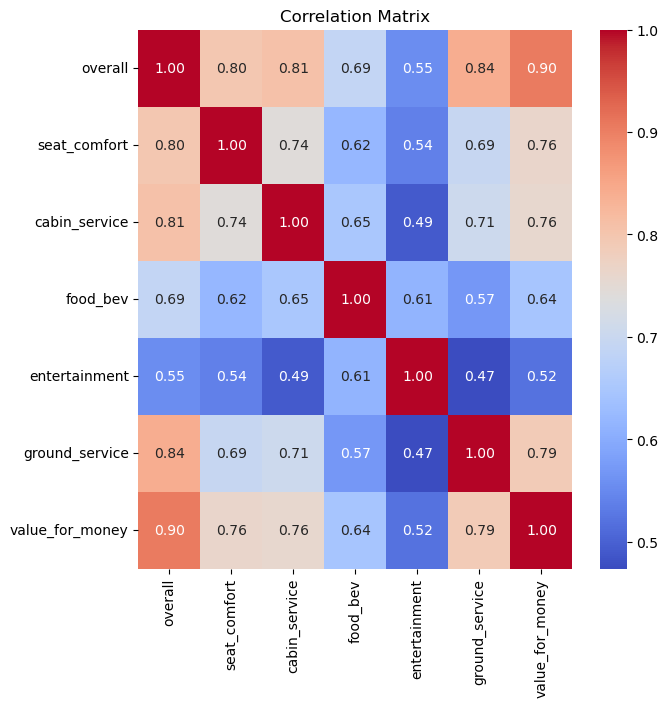

In [515]:
## Correlation Matrix:

# Select only numeric columns
numeric_data = airline_data.select_dtypes(include=['number'])

# Correlation Matrix
plt.figure(figsize=(7, 7))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

## Removing Multicollinearity Features:

In [519]:
#Creating a function to remove multicollinear
def calc_vif(X):
 
   # Calculating VIF
   vif = pd.DataFrame()
   vif["variables"] = X.columns
   vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
 
   return(vif)

In [521]:

calc_vif(airline_data[[i for i in airline_data.describe().columns if i not in ['recommended','value_for_money','overall']]])


,variables,VIF
0,seat_comfort,12.630363
1,cabin_service,13.133383
2,food_bev,12.019264
3,entertainment,9.394911
4,ground_service,8.843739


In [523]:
#drop overall column
airline_data.drop(['overall'],axis=1,inplace=True)

In [525]:
#drop airline column 
airline_data.drop(['airline'],axis=1,inplace=True)

In [527]:
airline_data.head()

,traveller_type,cabin,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
1,Business,Economy Class,4.0,5.0,4.0,4.0,2.0,4.0,yes
3,Family Leisure,Economy Class,4.0,1.0,1.0,1.0,1.0,1.0,no
5,Business,Economy Class,1.0,4.0,1.0,3.0,1.0,2.0,no
7,Solo Leisure,Economy Class,4.0,5.0,5.0,5.0,5.0,5.0,yes
9,Solo Leisure,Economy Class,1.0,1.0,1.0,1.0,1.0,1.0,no


## Label Encoding

In [532]:
#converting target column
airline_data['recommended'].replace({'yes':1,'no':0},inplace=True)

airline_data.head()

,traveller_type,cabin,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
1,Business,Economy Class,4.0,5.0,4.0,4.0,2.0,4.0,1
3,Family Leisure,Economy Class,4.0,1.0,1.0,1.0,1.0,1.0,0
5,Business,Economy Class,1.0,4.0,1.0,3.0,1.0,2.0,0
7,Solo Leisure,Economy Class,4.0,5.0,5.0,5.0,5.0,5.0,1
9,Solo Leisure,Economy Class,1.0,1.0,1.0,1.0,1.0,1.0,0


In [534]:
#seperate independent and dependentfeatures
y = airline_data['recommended']
x = airline_data.drop(columns='recommended')

## One Hot Encoding

In [539]:
#encoding
x = pd.get_dummies(x)
x

,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,traveller_type_Business,traveller_type_Couple Leisure,traveller_type_Family Leisure,traveller_type_Solo Leisure,cabin_Business Class,cabin_Economy Class,cabin_First Class,cabin_Premium Economy
1,4.0,5.0,4.0,4.0,2.0,4.0,True,False,False,False,False,True,False,False
3,4.0,1.0,1.0,1.0,1.0,1.0,False,False,True,False,False,True,False,False
5,1.0,4.0,1.0,3.0,1.0,2.0,True,False,False,False,False,True,False,False
7,4.0,5.0,5.0,5.0,5.0,5.0,False,False,False,True,False,True,False,False
9,1.0,1.0,1.0,1.0,1.0,1.0,False,False,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131706,1.0,2.0,1.0,3.0,2.0,2.0,True,False,False,False,False,True,False,False
131708,3.0,1.0,3.0,3.0,1.0,3.0,False,True,False,False,False,True,False,False
131710,2.0,2.0,3.0,3.0,4.0,1.0,False,False,False,True,False,True,False,False
131712,1.0,1.0,1.0,3.0,1.0,5.0,False,True,False,False,False,True,False,False


## Handling Class Imbalances

The Percentage of No labels of Target Variable is 57.0
The Percentage of Yes labels of Target Variable is 43.0


<Axes: xlabel='recommended', ylabel='count'>

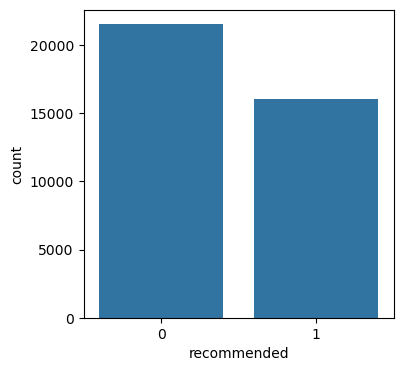

In [544]:
print("The Percentage of No labels of Target Variable is",np.round(y.value_counts()[0]/len(y)*100))
print("The Percentage of Yes labels of Target Variable is",np.round(y.value_counts()[1]/len(y)*100))
sns.countplot(x=airline_data['recommended'],data=airline_data)

## Data PreProcessing:

In [549]:
#splitting train and test split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [551]:
#shape of x_train and x_test
print(x_train.shape)
print(x_test.shape)

(28154, 14)
(9385, 14)


In [553]:
#shape of y_train and y_test
print(y_train.shape)
print(y_test.shape)

(28154,)
(9385,)


## Model Building

## 1.Logistic Regression:

In [557]:
#logistic regreesion fitting
log_class = LogisticRegression(max_iter=10000)
log_class.fit(x_train,y_train)

LogisticRegression(max_iter=10000)

In [559]:
y_pred_logclass = log_class.predict(x_test)

In [561]:
#training and testing score 
print(log_class.score(x_train,y_train))
print(log_class.score(x_test,y_test))


0.9472543865880514
0.9427810335641982


In [563]:
#report of logistic regression 
report_lR = classification_report(y_test, y_pred_logclass)
print(report_lR)

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      5335
           1       0.94      0.93      0.93      4050

    accuracy                           0.94      9385
   macro avg       0.94      0.94      0.94      9385
weighted avg       0.94      0.94      0.94      9385



## We got 93% accuracy with Logistic Regression

<Axes: >

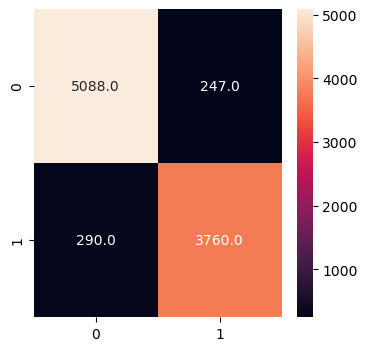

In [565]:
#confusion matrix of logistic regression
confuse_mat_lr = confusion_matrix(y_test,y_pred_logclass)

#plotting confusion matrix
sns.heatmap(confuse_mat_lr, annot=True, fmt = ".1f")

## Logistic Regression with Cross validation:

In [569]:
#cross validation
grid = {'C':10.0 **np.arange(-2,3),'penalty':['l1','l2','elasticnet','none']}
cv = KFold(n_splits=5,random_state=None,shuffle=False)

In [571]:
#hyper parameter tuning
clf_logclass = GridSearchCV(log_class,grid,cv=cv,n_jobs=-1,scoring='f1_macro')

In [573]:
#fit training data
clf_logclass.fit(x_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(max_iter=10000), n_jobs=-1,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'penalty': ['l1', 'l2', 'elasticnet', 'none']},
             scoring='f1_macro')

In [574]:
#predicting the result
y_pred_hyper_logclass = clf_logclass.predict(x_test)

In [577]:
#training and testing data score
print(clf_logclass.score(x_train,y_train))
print(clf_logclass.score(x_test,y_test))


0.9463456452213107
0.9413980770540076


In [579]:
#best parameters after hyper-parameter tuning
print(clf_logclass.best_params_)

{'C': 0.01, 'penalty': 'l2'}


In [581]:
#report of logistic regression with hyper-parameter tuning
report_lR_hyper = classification_report(y_test, y_pred_hyper_logclass)
print(report_lR_hyper)

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      5335
           1       0.94      0.93      0.93      4050

    accuracy                           0.94      9385
   macro avg       0.94      0.94      0.94      9385
weighted avg       0.94      0.94      0.94      9385



<Axes: >

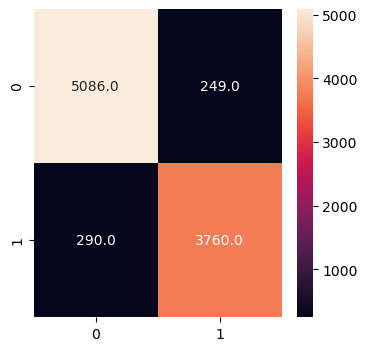

In [583]:
#confusion matrix of logistic regression with hyper-parameter tuning
confuse_mat_lr_hyper = confusion_matrix(y_test,y_pred_hyper_logclass)

#plotting confusion matrix
sns.heatmap(confuse_mat_lr_hyper, annot=True, fmt = ".1f")

## 2.Decision Tree

In [586]:
#Intialize decision tree model
decision_tree_class = DecisionTreeClassifier()

#fit training data
decision_tree_class.fit(x_train,y_train)

DecisionTreeClassifier()

In [588]:
#predict the result
y_pred_decision_tree = decision_tree_class.predict(x_test)

In [590]:
#training and testing score
print(decision_tree_class.score(x_train,y_train))
print(decision_tree_class.score(x_test,y_test))

0.9843006322369823
0.9179541822056473


In [592]:
##report of decision tree classifier
report_dt = classification_report(y_test, y_pred_decision_tree)
print(report_dt)

              precision    recall  f1-score   support

           0       0.92      0.94      0.93      5335
           1       0.92      0.89      0.90      4050

    accuracy                           0.92      9385
   macro avg       0.92      0.91      0.92      9385
weighted avg       0.92      0.92      0.92      9385



<Axes: >

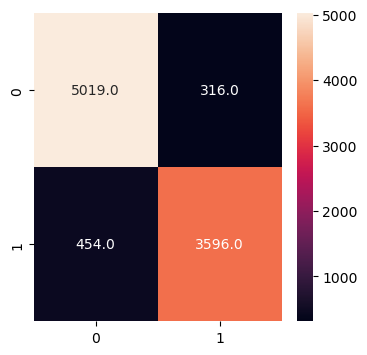

In [594]:
#confusion matrix for decision tree classifier
con_mat_decision_tree = confusion_matrix(y_test,y_pred_decision_tree)

#plotting the confusion matrix
sns.heatmap(con_mat_decision_tree,annot=True,fmt='.1f')

## Decision Tree with Hyperparameter tuning:

In [596]:
#preprunning
params = {
    'criterion':['gini','entropy','logloss'],
    'splitter' : ['best','random'],
    'max_depth':[5,6,7,8],
    'max_features':['auto','sqrt','log2'],
    "min_samples_split":[5,7]
    # "min_samples_leaf":[2,3]
}

In [599]:
#hyper-parametr tuning
clf_decision_tree = GridSearchCV(decision_tree_class,params,cv=cv,n_jobs=-1,scoring='accuracy')

In [601]:
#fit train data
clf_decision_tree.fit(x_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'logloss'],
                         'max_depth': [5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [5, 7],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [603]:
#predict result
y_pred_decision_tree_hyper = clf_decision_tree.predict(x_test)

In [605]:
#accuracy score of train and test data
print(clf_decision_tree.score(x_train,y_train))
print(clf_decision_tree.score(x_test,y_test))

0.9384101726220075
0.929035695258391


In [607]:
#report of decision tree classifier with hyper-parameter tuning
report_dt_hyper = classification_report(y_test,y_pred_decision_tree_hyper)
print(report_dt_hyper)

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      5335
           1       0.93      0.90      0.92      4050

    accuracy                           0.93      9385
   macro avg       0.93      0.93      0.93      9385
weighted avg       0.93      0.93      0.93      9385



<Axes: >

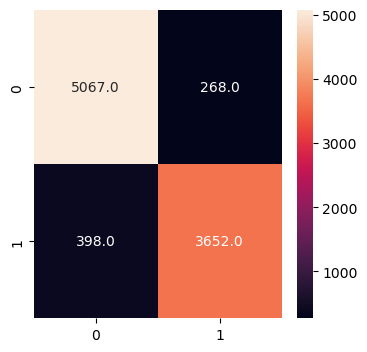

In [609]:
#confusion matrix
con_mat_dt_hyper = confusion_matrix(y_test,y_pred_decision_tree_hyper)

#plot confusion matrix
sns.heatmap(con_mat_dt_hyper,annot=True,fmt=".1f")

## 3.Random Forest:

In [612]:
#Intailize random forest model
random_forest_classifier = RandomForestClassifier()
#fit train data
random_forest_classifier.fit(x_train,y_train)

RandomForestClassifier()

In [614]:
#predict result
y_pred_rf = random_forest_classifier.predict(x_test)

In [616]:
#get train and test score
print(random_forest_classifier.score(x_train,y_train))
print(random_forest_classifier.score(x_test,y_test))

0.9842651133053918
0.9348961108151306


In [618]:
#report of random forest classifier
report_rf_classifier = classification_report(y_test,y_pred_rf)
print(report_rf_classifier)

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      5335
           1       0.94      0.91      0.92      4050

    accuracy                           0.93      9385
   macro avg       0.93      0.93      0.93      9385
weighted avg       0.93      0.93      0.93      9385



<Axes: >

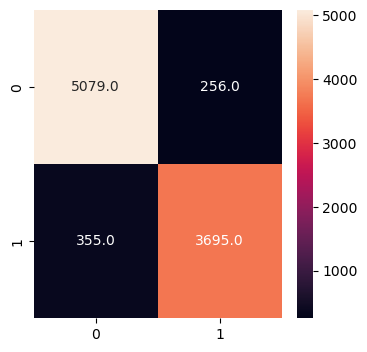

In [620]:
#confusion matrix 
con_mat_rf = confusion_matrix(y_test,y_pred_rf)

#plot confusion matrix
sns.heatmap(con_mat_rf,annot=True,fmt=".1f")

## random forest with Hyperparameter tuning:

In [623]:
#prepruning
params_rf = {
    'criterion':['gini','entropy','logloss'],
    'max_depth': [2,3,5,7,10],
    'min_samples_leaf': [5,7,10],
    "min_samples_leaf":[2,3],
    'n_estimators': [10,25,30]
}

In [625]:
#hyper-parameter tuning
clf_rf = GridSearchCV(random_forest_classifier,params_rf,cv=cv,n_jobs=-1,scoring='accuracy')

In [627]:
# fit train data
clf_rf.fit(x_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'logloss'],
                         'max_depth': [2, 3, 5, 7, 10],
                         'min_samples_leaf': [2, 3],
                         'n_estimators': [10, 25, 30]},
             scoring='accuracy')

In [628]:
#predict result
y_pred_rf_hyper=clf_rf.predict(x_test)

In [629]:
#train and test score
print(clf_rf.score(x_train,y_train))
print(clf_rf.score(x_test,y_test))

0.9548199190168359
0.9401172083111348


In [633]:
#best parameters after hyper-parameter tuning
print(clf_rf.best_params_)
print(clf_rf.best_score_)

{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 3, 'n_estimators': 30}
0.947325484748378


In [635]:
#report of random forest classifier
report_rf_classifier_hyper = classification_report(y_test,y_pred_rf_hyper)
print(report_rf_classifier_hyper)


              precision    recall  f1-score   support

           0       0.94      0.96      0.95      5335
           1       0.94      0.92      0.93      4050

    accuracy                           0.94      9385
   macro avg       0.94      0.94      0.94      9385
weighted avg       0.94      0.94      0.94      9385



<Axes: >

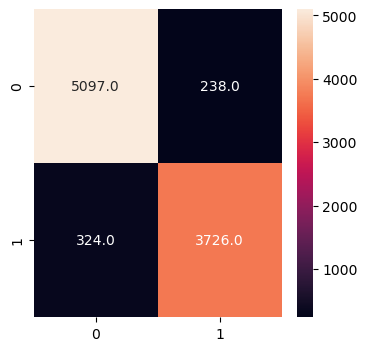

In [637]:
#confusion matrix
con_mat_rf_hyper = confusion_matrix(y_test,y_pred_rf_hyper)

#plot confusion matrix
sns.heatmap(con_mat_rf_hyper,annot=True,fmt='.1f')

In [639]:
#define knn mode
knn_classifier = KNeighborsClassifier()
#fit train data
knn_classifier.fit(x_train,y_train)

KNeighborsClassifier()

In [641]:
#predict result
y_pred_knn = knn_classifier.predict(x_test)

In [643]:
#train and test score
print(knn_classifier.score(x_train,y_train))
print(knn_classifier.score(x_test,y_test))

0.9568089791859061
0.9373468300479488


In [644]:
#report of knn
report_knn_classifier = classification_report(y_test,y_pred_knn)
print(report_knn_classifier)

              precision    recall  f1-score   support

           0       0.94      0.95      0.95      5335
           1       0.94      0.92      0.93      4050

    accuracy                           0.94      9385
   macro avg       0.94      0.93      0.94      9385
weighted avg       0.94      0.94      0.94      9385



<Axes: >

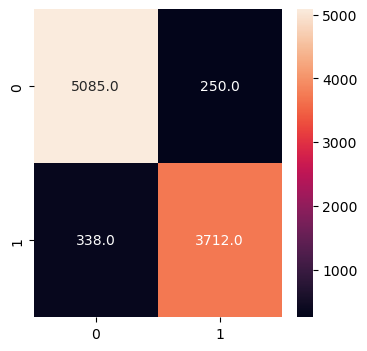

In [647]:
#confusion matrix
con_mat_knn  = confusion_matrix(y_test,y_pred_knn)

#plot confusion matrix
sns.heatmap(con_mat_knn,annot=True,fmt=".1f")


In [649]:
#define model
support_vector = LinearSVC()

#fit train data
support_vector.fit(x_train,y_train)

LinearSVC()

In [650]:
#predict the result
y_pred_svm = support_vector.predict(x_test)

In [651]:
#train and test score
print(support_vector.score(x_train,y_train))
print(support_vector.score(x_test,y_test))

0.9473609433828231
0.9432072456046884


In [655]:
#report of svm 
report_svm= classification_report(y_test,y_pred_svm)
print(report_svm)

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      5335
           1       0.94      0.93      0.93      4050

    accuracy                           0.94      9385
   macro avg       0.94      0.94      0.94      9385
weighted avg       0.94      0.94      0.94      9385



<Axes: >

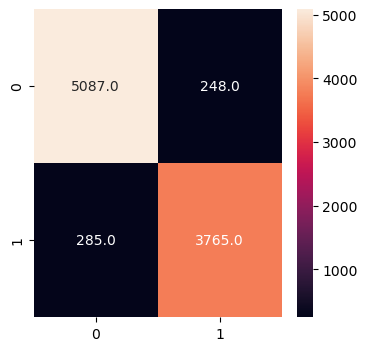

In [657]:
#confusion matrix
con_mat_svm = confusion_matrix(y_test,y_pred_svm)

#plot confusion matrix
sns.heatmap(con_mat_svm,annot=True,fmt=".1f")

In [659]:
#define naive bayes model
naive_bayes = GaussianNB()

#fit train data
naive_bayes.fit(x_train, y_train)

GaussianNB()

In [661]:
#predict the result
y_pred_naive = naive_bayes.predict(x_test)

In [663]:
#train and test score
print(naive_bayes.score(x_train,y_train))
print(naive_bayes.score(x_test,y_test))

0.9406833842438019
0.9335109216835376


In [665]:
#report of naive bayes
report_naive= classification_report(y_test,y_pred_naive)
print(report_naive)

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      5335
           1       0.92      0.92      0.92      4050

    accuracy                           0.93      9385
   macro avg       0.93      0.93      0.93      9385
weighted avg       0.93      0.93      0.93      9385



<Axes: >

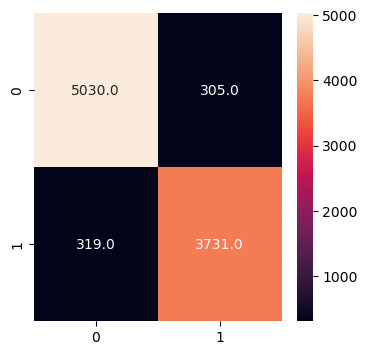

In [667]:
#confusion matrix
con_mat_naive = confusion_matrix(y_test,y_pred_naive)

#plot confusion matrix
sns.heatmap(con_mat_naive,annot=True,fmt=".1f")

In [669]:
#Creating a function to return all Models Accuracy Score 

def accuracy_of_each_model(model,X_train,X_test):

  #predicting a train datas
  y_train_preds=model.predict(X_train)

  #predicting a test datas
  y_test_preds=model.predict(X_test)

  #storing all training scores
  train_scores=[]

  #storing all test scores
  test_scores=[]
  metrics=['Accuracy_Score','Precsion_Score','Recall_Score','Roc_Auc_Score']

  # Get the accuracy scores
  train_accuracy_score = accuracy_score(y_train,y_train_preds)
  test_accuracy_score = accuracy_score(y_test,y_test_preds)
  
  train_scores.append(train_accuracy_score)
  test_scores.append(test_accuracy_score)

  # Get the precision scores
  train_precision_score = precision_score(y_train,y_train_preds)
  test_precision_score = precision_score(y_test,y_test_preds)

  train_scores.append(train_precision_score)
  test_scores.append(test_precision_score)

  # Get the recall scores
  train_recall_score =recall_score(y_train,y_train_preds)
  test_recall_score =recall_score(y_test,y_test_preds)

  train_scores.append(train_recall_score)
  test_scores.append(test_recall_score)

  # Get the roc_auc scores
  train_roc_auc_score=roc_auc_score(y_train,y_train_preds)
  test_roc_auc_score =roc_auc_score(y_test,y_test_preds)

  train_scores.append(train_roc_auc_score)
  test_scores.append(test_roc_auc_score)

  return train_scores,test_scores,metrics

In [671]:
models=[log_class,clf_decision_tree,clf_rf,knn_classifier,support_vector,naive_bayes]
name=['Logistic Regression Model','Decision Tree Model After Hyperparameter Tuning','Random Forest Model After Hyperparameter Tuning','k_neighbor','support vector machine','Naive Bayes Classifier']

In [673]:
for model_ in range(len(models)):
  train_score_,test_score_,metrics_=accuracy_of_each_model(models[model_],x_train,x_test)
  print("-*-*-"*3+f"{name[model_]}"+"-*-*-"*4)
  print("")
  print(pd.DataFrame(data={'Metrics':metrics_,'Train_Score':train_score_,'Test_Score':test_score_}))
  print("")


-*-*--*-*--*-*-Logistic Regression Model-*-*--*-*--*-*--*-*-

          Metrics  Train_Score  Test_Score
0  Accuracy_Score     0.947254    0.942781
1  Precsion_Score     0.940096    0.938358
2    Recall_Score     0.935621    0.928395
3   Roc_Auc_Score     0.945744    0.941049

-*-*--*-*--*-*-Decision Tree Model After Hyperparameter Tuning-*-*--*-*--*-*--*-*-

          Metrics  Train_Score  Test_Score
0  Accuracy_Score     0.938410    0.929036
1  Precsion_Score     0.937319    0.931633
2    Recall_Score     0.916500    0.901728
3   Roc_Auc_Score     0.935565    0.925747

-*-*--*-*--*-*-Random Forest Model After Hyperparameter Tuning-*-*--*-*--*-*--*-*-

          Metrics  Train_Score  Test_Score
0  Accuracy_Score     0.954820    0.940117
1  Precsion_Score     0.950505    0.939960
2    Recall_Score     0.942886    0.920000
3   Roc_Auc_Score     0.953270    0.937694

-*-*--*-*--*-*-k_neighbor-*-*--*-*--*-*--*-*-

          Metrics  Train_Score  Test_Score
0  Accuracy_Score     0.956809  

In [675]:
pip install gradio


     ---------------------------------------- 0.0/42.9 kB ? eta -:--:--
     ---------------------------------------- 42.9/42.9 kB 2.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/57.2 MB ? eta -:--:--
   ---------------------------------------- 0.1/57.2 MB 1.7 MB/s eta 0:00:33
   ---------------------------------------- 0.1/57.2 MB 2.8 MB/s eta 0:00:21
   ---------------------------------------- 0.3/57.2 MB 2.4 MB/s eta 0:00:24
   ---------------------------------------- 0.4/57.2 MB 2.2 MB/s eta 0:00:27
   ---------------------------------------- 0.7/57.2 MB 2.9 MB/s eta 0:00:20
    --------------------------------------- 0.9/57.2 MB 3.3 MB/s eta 0:00:17
    --------------------------------------- 1.2/57.2 MB 3.7 MB/s eta 0:00:16
   - -------------------------------------- 1.6/57.2 MB 4.2 MB/s eta 0:00:14
   - -------------------------------------- 2.0/57.2 MB 4.6 MB/s eta 0:00:12
   - -------------------------------------- 2.3/57.2 MB 5.0 MB/s eta 0:00:11
   - ---

In [677]:

# Load your pre-trained model
model = clf_rf

# Define a function for prediction
def predict(seat_comfort, cabin_service, food_bev, entertainment, ground_service, value_for_money, traveller_type, cabin_class):
    # Prepare the input data as a DataFrame
    input_data = pd.DataFrame({
        'seat_comfort': [seat_comfort],
        'cabin_service': [cabin_service],
        'food_bev': [food_bev],
        'entertainment': [entertainment],
        'ground_service': [ground_service],
        'value_for_money': [value_for_money],
        'traveller_type_Business': [1 if traveller_type == 'Business' else 0],
        'traveller_type_Couple Leisure': [1 if traveller_type == 'Couple Leisure' else 0],
        'traveller_type_Family Leisure': [1 if traveller_type == 'Family Leisure' else 0],
        'traveller_type_Solo Leisure': [1 if traveller_type == 'Solo Leisure' else 0],
        'cabin_Business Class': [1 if cabin_class == 'Business Class' else 0],
        'cabin_Economy Class': [1 if cabin_class == 'Economy Class' else 0],
        'cabin_First Class': [1 if cabin_class == 'First Class' else 0],
        'cabin_Premium Economy': [1 if cabin_class == 'Premium Economy' else 0]
    })

    # Make predictions using the model
    prediction = model.predict(input_data)
    return prediction[0]


In [679]:
import gradio as gr

# Define the Gradio interface inputs and outputs
inputs = [
    gr.Slider(0, 5, step=1, label="Seat Comfort"),
    gr.Slider(0, 5, step=1, label="Cabin Service"),
    gr.Slider(0, 5, step=1, label="Food & Beverages"),
    gr.Slider(0, 5, step=1, label="Entertainment"),
    gr.Slider(0, 5, step=1, label="Ground Service"),
    gr.Slider(0, 5, step=1, label="Value for Money"),
    gr.Dropdown(['Business', 'Couple Leisure', 'Family Leisure', 'Solo Leisure'], label="Traveller Type"),
    gr.Dropdown(['Business Class', 'Economy Class', 'First Class', 'Premium Economy'], label="Cabin Class")
]

output = gr.Textbox(label="Prediction")

# Create the Gradio interface
interface = gr.Interface(
    fn=predict,
    inputs=inputs,
    outputs=output,
    title="Airline Satisfaction Prediction"
)

# Launch the Gradio app
interface.launch()


* Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.
